### Predictive statistics: class example 3, non-linear regression

In this notebook, we will practice implementing non-linear regression using the Support Vector Regression (SVR) method of scikit-learn. We will use toy data, as in the last examples, so that you can practice changing the parameters to understand how this changes the results.

First let's set up the libraries:

In [1]:
# import numpy to generate toy data, and matplotlib to plot it
import numpy as np
import matplotlib.pyplot as plt
# set up matplotlib to show the figures inline
plt.ion()
%matplotlib inline
# import the SVR method from scikit-learn
from sklearn.svm import SVR

As before, we create some toy data. We will use the same non-linear function that we generated in class example 2:

Text(0, 0.5, 'y')

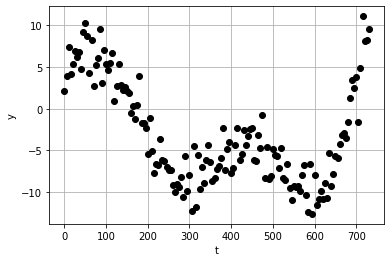

In [2]:
# create evenly-spaced "time" variable, covering 730 days, with 1 observation every 5 days
t = np.arange(0,731,5)
# define a non-linear trend
x1 = 3 + 0.05*np.sinh(t*1e-2)
# define a seasonal cycle
x2 = 4 + 3*np.sin(2*np.pi*t/360)
# define a linear trend
x3 = -1 - t/20

# combine the three contributions and some noise to make our output data
a1 = 0.8
a2 = 1.5
a3 = 0.6
b = -4
epsilon = np.random.randn(len(t))
y = b + (a1*x1) + (a2*x2) + (a3*x3) + 2*epsilon
plt.figure()
plt.plot(t,y,'ko',label=r'y = b + (a1*x1) + (a2*x2) + (a3*x3) + $\epsilon$')
plt.grid()
plt.xlabel('t')
plt.ylabel('y')

If somebody gave us this time series with no other information, we might not be sure how we could represent it using a linear model. All we know is that y=f(t). The non-linear model will allow us to predict values of y, given t, without knowing anything about the form of the function f.

We'll implement the method below:

In [3]:
# specify epsilon: the half-width of the "corridor" of data around the fitted line
epsilon = 1

# set up a generic instance of the model
model=SVR(C=50, epsilon=epsilon)
# C is the "regularisation" term: this stops
# the model from becoming too complicated (overfitting)
# smaller C gives stronger regularisation (i.e. a simpler model)

# fit the model
model.fit(t[:,None],y)

# and predict values of ŷ
y_hat=model.predict(t[:,None])

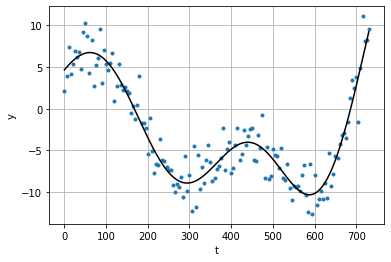

In [4]:
# plot the results
plt.plot(t,y,'.')
plt.plot(t,y_hat,'k-')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()

You can try varying the values of epsilon and C below to help you understand the effects of these 2 parameters. To recap:
- C controls how complicated the fitted function is: when C is very small, the model will become very simple. When C is bigger, it is possible for the model to become too complicated
- epsilon controls how much data surrounds the fitted line at each point

Try the following values, and see how the fitted line changes:
- epsilon=1, C=1 (for our data, C will be too small: the fitted model is too simple and is not capturing all the variability)
- epsilon=10, C=50 (epsilon is too big)
- epsilon=10, C=1 (combining the above two problems)


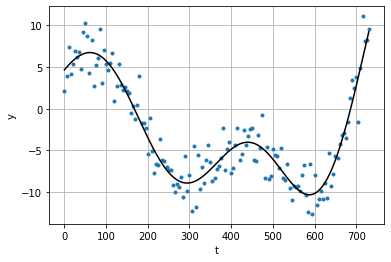

In [5]:
# specify epsilon: the half-width of the "corridor" of data around the fitted line
epsilon = 1
# specify the regularisation parameter, C:
C=50

# set up and fit the model
model=SVR(C=C, epsilon=epsilon).fit(t[:,None],y)

# predict values of ŷ
y_hat=model.predict(t[:,None])

# plot the results
plt.plot(t,y,'.')
plt.plot(t,y_hat,'k-')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()

You can read more about the SVR method by running the following cell if you wish:

In [ ]:
SVR?